</br>
<div style="display: flex; justify-content: space-between; align-items: flex-start; border-bottom: 2px solid #555555; padding-bottom: 15px; margin-bottom: -8px;">
    <div style="width: 50%;">
        <h2>
            <span style="color: #B30033;">▍</span>Práctica 1:
        </h2>
        <h1 style="margin-top: -10px;">
            Análisis, procesamiento y validación
        </h1>
    </div>
    <div style="width: 50%; text-align: right;">
        <div style="display: flex; justify-content: space-between; align-items: flex-start; margin-top: 30px;">
            <div style="width: 20%;"></div>
            <div style="width: 80%; border-left: 2px solid #555555; padding-left: 20px;">
                <div style="margin-bottom: 20px;">
                    <p style="margin: 0; font-size: 1.4em; font-weight: bold;">
                        Minería de Datos, 2025-26
                    </p>
                </div>
                <div style="margin-top: 8px; text-align: right;">
                    <span style="font-size: 1em; color: #D0D0D0;">
                        José Antonio Gámez Martín
                    </span>
                    <a href="mailto:Jose.Gamez@uclm.es" style="text-decoration: none; color: #888888; font-size: 0.8em; padding-left: 15px;">
                        ✉ Jose.Gamez@uclm.es
                    </a>
                </div>
                <div style="margin-top: 8px; text-align: right;">
                    <span style="font-size: 1em; color: #D0D0D0;">
                        Pablo Torrijos Arenas
                    </span>
                    <a href="mailto:Pablo.Torrijos@uclm.es" style="text-decoration: none; color: #888888; font-size: 0.8em; padding-left: 15px;">
                        ✉ Pablo.Torrijos@uclm.es
                    </a>
                </div>
                </div>
            </div>
        </div>
    </div>
</div>

<div style="border-bottom: 2px solid #555555; padding-bottom: 25px; margin-bottom: 10px">
    <div style="display: flex; align-items: center; margin-bottom: 10px;">
        <span style="color: #B30033; font-size: 1.5em; margin-right: 10px;">▍</span>
        <h3 style="margin: 0; font-size: 1.4em; font-weight: bold">
            Estudiante
        </h3>
    </div>
    <ul style="list-style-type: none; padding-left: 28px; margin: 0;  font-size: 1.1em">
        <li>Marcos López Gómez</li>
    </ul>

</div>

## 1. Introducción

El objetivo de esta práctica es aplicar las técnicas de un flujo de trabajo de **minería de datos** para resolver un problema de **clasificación supervisada**. Se analizará un conjunto de datos sobre el rendimiento y la actividad de estudiantes universitarios para predecir la probabilidad de abandono de sus estudios.

El desarrollo abarcará desde el **análisis exploratorio** de los datos y su **preprocesamiento**, hasta el **entrenamiento** de un modelo y su **validación** robusta. 

El rendimiento de los modelos se evaluará en una competición privada en Kaggle, que abarcará esta Práctica 1 y la Práctica 2 (selección de modelos).

<div style="border-bottom: 2px solid #555555; padding-bottom: 15px; margin-bottom: 10px">

## 2. Carga y visualización de los datos

Se proporciona un conjunto de datos sintético que simula el rendimiento académico y la interacción de estudiantes durante su primer año. Los datos contienen una variedad de tipos de variables, valores faltantes y otros artefactos que deberán ser gestionados.

Comenzamos importando las librerías necesarias y cargando los conjuntos de datos de entrenamiento (`train`) y de prueba (`test`) para poder examinarlos:

In [3]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

df_train = pd.read_csv('uclm_student_train.csv')
df_train

,id,nombre,nacimiento,provincia,residencia_id,trabaja,horas_trabajo,bachillerato,nota_acceso,modalidad,creditos_a1,superados_a1,nota_s1,satisfaccion,horas_moodle,posts_foro,uso_biblioteca,eventos,tutorias,comentarios,numero_fav,talla_zapato,color_fav,meses_matriculado,grupo_trabajo,abandono
0,TO-2010-GCA531,Graciano Cano Alsina,1992-05-06,Albacete,E1-P02-H04,0,NaN,Científico,6.08,Tiempo completo,60,60,8.16,4.32,~7.2 horas,2,11,1,4,relacion correcto con compañeros,71,43,Azul oscuro,6,GR10335,1
1,CU-2016-MBP239,María Belén Polo,1998-10-31,Cuenca,E2-P03-H06,0,NaN,CIENCIAS PURAS,8.12,Tiempo completo,60,60,9.09,4.05,~11.8 horas,13,2,2,0,Uso normal de la plataforma Moodle,22,38,Coral claro,6,GR13813,0
2,CR-2010-JS201,Judith Sáenz,1992-03-11,Ciudad Real,NaN,0,NaN,Ciencias Puras,10.59,Tiempo completo,60,54,7.99,3.88,~8.8 horas,6,14,2,3,NaN,69,37,Violeta oscuro,6,GR02505,0
3,TO-2016-CDB602,Casandra de Bautista,1998-11-03,Toledo,E1-P04-H18,0,NaN,Humanidades,7.85,Tiempo completo,60,48,7.27,3.81,~8.7 horas,0,0,2,3,Relacion adecuado con compañeros.,3,34,Rosa profundo,6,GR14887,0
4,AB-2011-CAA364,Carlito Alvarado Anaya,1993-12-22,Albacete,NaN,0,NaN,ECONÓMICO,10.23,Tiempo completo,60,60,8.45,4.08,~9.6 horas,16,6,2,3,ha mejorado notablemente en asignaturas troncales,19,39,Coral claro,5,GR09244,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40540,AB-2011-CB913,Cecilia Bosch,1993-04-14,Albacete,NaN,0,NaN,CIENCIAS SOCIALES,8.64,Tiempo completo,60,36,5.52,2.94,~1.1h,8,0,3,0,NaN,23,39,Rojo violeta medio,6,GR15949,1
40541,TO-2011-WRL313,Wilfredo Roda Lerma,1987-11-12,Toledo,NaN,1,NaN,Económico,10.59,Tiempo completo,60,60,9.00,4.05,~11.5 horas,8,2,3,2,NaN,76,40,Amarillo,6,GR11547,0
40542,CR-2017-JA946,Javi Acuña,1999-09-05,Ciudad Real,NaN,0,NaN,TECNOLÓGICO,10.41,Tiempo completo,60,54,NaN,3.52,~5.1 horas,3,8,4,4,Expresa dudas sobre continuar los estudios.,24,40,Gris claro,4,GR00625,1
40543,AB-2010-TRM306,Teresita Rodrigo Morera,1992-06-23,Albacete,NaN,0,NaN,Económico,10.15,Tiempo completo,60,54,7.36,3.70,~8.0 horas,10,3,4,0,NaN,39,38,Azul real,6,GR06859,0


In [4]:
df_test = pd.read_csv('uclm_student_test.csv')
df_test

,id,nombre,nacimiento,provincia,residencia_id,trabaja,horas_trabajo,bachillerato,nota_acceso,modalidad,creditos_a1,superados_a1,nota_s1,satisfaccion,horas_moodle,posts_foro,uso_biblioteca,eventos,tutorias,comentarios,numero_fav,talla_zapato,color_fav,meses_matriculado,grupo_trabajo
0,AB-2019-FEM764,Fabiola Espejo Marín,2002-01-12,Ciudad Real,E1-P01-H01,0,NaN,CCSS,10.17,Tiempo completo,60,48,7.74,3.81,~11.0 horas,16,14,5,5,Expresa dudas sobre su vocacion.,43,40,Violeta sonrojado pálido,6,GR01091
1,TO-2018-ALL744,Arsenio Lucas Llanos,2000-06-13,Toledo,NaN,0,NaN,Letras,9.16,Tiempo completo,60,48,6.99,3.28,~6.8 horas,2,5,5,1,NaN,88,40,Cian,6,GR02931
2,AB-2018-ZSD099,Zaira Salvà Dominguez,2000-09-25,Albacete,NaN,0,NaN,Ciencias Puras,8.91,Tiempo completo,60,60,8.28,4.48,10.0,12,2,6,2,Busca activamente prácticas y oportunidades pr...,96,39,Gris oscuro,3,GR06795
3,CR-2019-TCS733,Tatiana Celia Solano Tejera,2001-06-05,Ciudad Real,NaN,0,NaN,Letras,9.29,Tiempo completo,60,24,3.96,1.86,~0.8 horas,10,6,3,1,NaN,62,38,Blanco lavanda,6,GR06712
4,CR-2018-VBV597,Victoriano Benavente Vilaplana,2000-06-18,Ciudad Real,NaN,0,NaN,Letras,5.00,Tiempo completo,60,0,2.85,1.26,~5.9 horas,17,2,2,0,NaN,98,44,Azul Alicia,2,GR01653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9582,AB-2019-AAM365,Albino Acero Múgica,2002-02-14,Albacete,NaN,0,NaN,Tecnológico Industrial,9.38,Tiempo completo,60,30,4.74,2.20,~4.2 horas,11,1,5,0,NaN,98,41,Marrón siena,6,GR13835
9583,AB-2019-MC507,Marina Calleja,2002-01-07,Albacete,NaN,0,NaN,CCSS,6.41,Tiempo completo,60,60,9.52,4.97,~8.4 horas,3,7,6,2,Asistencia constante a clases.,33,38,Amarillo,6,GR14729
9584,AB-2019-MNC716,Morena Noelia Castell Amor,2001-04-05,Albacete,NaN,0,NaN,Letras,9.60,Tiempo completo,60,24,5.09,2.35,7.8,2,9,2,2,Habla de cambiar de ciudad por motivos persona...,96,35,Azul anciano,6,GR11046
9585,AB-2018-ICH450,Isidora Cabrera Hoyos,2001-02-09,Albacete,NaN,1,NaN,CCSS,9.79,Tiempo completo,60,48,7.05,3.59,11.5,12,1,2,2,NaN,82,37,Blanco,6,GR10480


Las variables disponibles son:
`id`, `nombre`, `nacimiento`, `provincia`, `residencia_id`, `trabaja`, `horas_trabajo`, `bachillerato`, `nota_acceso`, `modalidad`, `creditos_a1`, `superados_a1`, `nota_s1`, `satisfaccion`, `horas_moodle`, `posts_foro`, `uso_biblioteca`, `eventos`, `tutorias`, `comentarios`, `numero_fav`, `talla_zapato`, `color_fav`, `meses_matriculado`, `grupo_trabajo`, `abandono`.

La variable objetivo es `abandono`, que es binaria:
* **1**: El estudiante abandona los estudios.
* **0**: El estudiante continúa.

Se puede observar cómo hay variables categóricas, numéricas, fechas, texto, valores faltantes... Esto requerirá de un análisis exploratorio y un preprocesamiento.

<div style="border-bottom: 2px solid #555555; padding-bottom: 15px; margin-bottom: 10px">

## 3. Flujo de Trabajo y Requisitos

El desarrollo de la práctica deberá seguir las siguientes etapas:


### 3.1. Análisis Exploratorio de Datos (EDA)

Se debe realizar un análisis inicial para comprender la naturaleza de los datos. Este análisis debe incluir:
* Distribución de la variable objetivo (`abandono`).
* Análisis de valores faltantes.
* Distribución de las variables numéricas y categóricas, valores únicos, outliers...
* Identificación de valores atípicos.
* Relaciones entre las variables y la variable objetivo.

Las conclusiones de este análisis deben servir para justificar las decisiones tomadas en la siguiente etapa.


### 3.2. Preprocesamiento de Datos

Esta etapa es fundamental para preparar los datos antes de la modelización. Las tareas incluyen la imputación de valores faltantes, la codificación de variables categóricas, la ingeniería de características (ej. creación de nuevas variables a partir de las existentes), el escalado de datos o incluso eliminar variables que nos aporten información

Este proceso debe de ir totalmente ligado al EDA. Las conclusiones que hayamos sacado en el estudio son las que nos deben guiar en este paso. Del mismo modo, al preprocesar los datos y entrenar los modelos podemos sacar nuevas conclusiones que nos permitan entender mejor los datos (como habéis visto en **CRISP-DM**):

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png" alt="Diagrama de Proceso CRISP-DM" width="550"/>

**Requisito obligatorio**: Todo el proceso de transformación de datos **debe** encapsularse en `Pipelines` de `scikit-learn`. En la práctica, además de mantener una mayor claridad y estructura en el código, esto nos ayudará a evitar fugas de datos.


### 3.3. Modelización y Validación

Se debe entrenar y evaluar correctamente **al menos un algoritmo** (ej. Árboles de Decisión, Naive Bayes, etc.). En esta práctica no es importante usar el mejor modelo posible (eso vendrá en la Práctica 2), sino analizar, preparar y evaluar bien los datos.

**Requisito obligatorio**: La evaluación y comparación de los modelos **debe** realizarse mediante una estrategia de **validación cruzada**. Además, es imporante tener en cuenta distintas **métricas** para evaluar nuestro modelo.


### 3.4. Predicción y Evaluación

El modelo final se puede utilizar para generar predicciones sobre el conjunto `uclm_student_test.csv`. Esto es recomendable, pero no es obligatorio en esta práctica (lo será en la Práctica 2).

El fichero de predicciones deberá seguir el formato especificado en `sample_submission.csv`:

In [5]:
df_kaggle = pd.read_csv('sample_submission.csv')
df_kaggle

,id,abandono
0,AB-2019-FEM764,1
1,TO-2018-ALL744,1
2,AB-2018-ZSD099,0
3,CR-2019-TCS733,0
4,CR-2018-VBV597,0
...,...,...
9582,AB-2019-AAM365,0
9583,AB-2019-MC507,1
9584,AB-2019-MNC716,0
9585,AB-2018-ICH450,0


<div style="border-bottom: 2px solid #555555; margin-bottom: 10px">

## 4. Competición en Kaggle

La evaluación final se realizará mediante una competición privada en Kaggle. El objetivo es maximizar la métrica **F1-Score**, una medida robusta que tiene en cuenta tanto la precisión como la exhaustividad, especialmente útil en casos con clases desbalanceadas.

* **Enlace a la competición**: https://www.kaggle.com/t/16fef7f5d88c4dd399f8bad259c55947

Los equipos con mejor rendimiento en el *private leaderboard* recibirán una bonificación en la nota final:
* **1er puesto**: +0.75 puntos.
* **2º puesto**: +0.5 puntos.
* **3er puesto**: +0.25 puntos.

**Nota**: Las bonificaciones están sujetas a la revisión del código y la metodología. Se podrá requerir una justificación del enfoque para verificar la originalidad y la comprensión del trabajo.

## **<font color="#B30033" size=10>Trabajo Realizado </font>** 
## 1. Análisis exploratorio de los datos

La primera parte que realizaré es el EDA, y a partir de los resultados que obtenga de este, realizaré los siguientes apartados.<br>
Comenzaré comprobando la frecuencia de abandonos y no abandonos en los datos de entrenamiento.

In [6]:
perdidos = df_train['abandono'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'abandono'")

x= df_train['abandono'].value_counts()

print("Numero de 0s (No abandonos): ",x.get(0,0))
print("Numero de 1s (Abandonos): ",x.get(1,0))

Hay  0  valores perdidos en 'abandono'
Numero de 0s (No abandonos):  30092
Numero de 1s (Abandonos):  10453


Ahora lo mismo pero más visual.

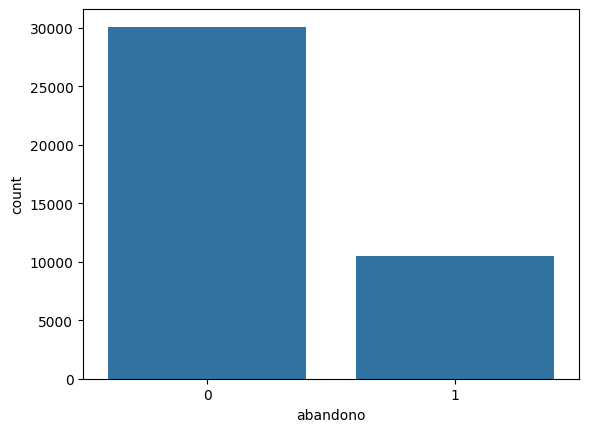

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='abandono',data=df_train)
plt.show()


Después de comprobar que los abandonos suponen más o menos un cuarto del total; procederé comprobando la relación que existe entre el resto de variables por la objetivo. Comenzaré con aquellas varibles que no necesiten ningún tipo de transformación para comprobar esto.

Hay  0  valores perdidos en 'trabaja'


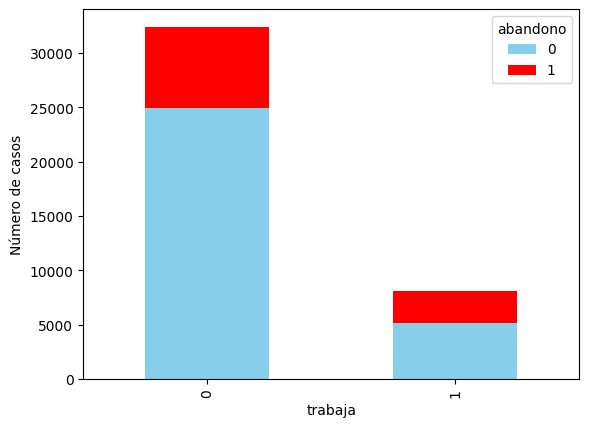

<Figure size 800x600 with 0 Axes>

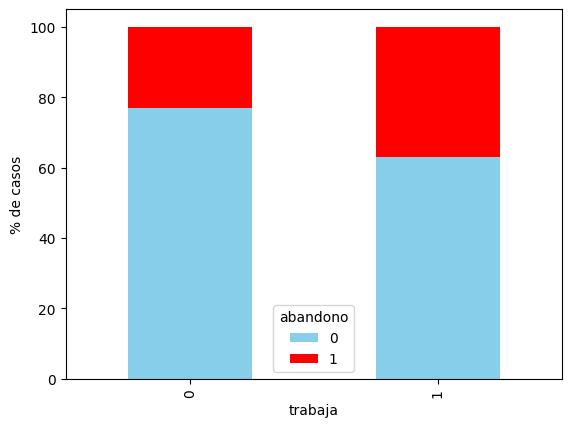

In [8]:
# variable trabaja
perdidos = df_train['trabaja'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'trabaja'")

x = pd.crosstab(df_train['trabaja'], df_train['abandono'])
x.plot(kind='bar', stacked=True, color=['skyblue', 'red'])
plt.ylabel('Número de casos')
plt.show()

#Ahora lo mismo, pero normalizada, para ver mejor la relación de abandonos y no abandonos

x = pd.crosstab(df_train['trabaja'], df_train['abandono'], normalize='index') * 100
plt.figure(figsize=(8, 6))
x.plot(kind='bar', stacked=True, color=['skyblue', 'red'])
plt.ylabel('% de casos')
plt.show()

Parece que puede ser relevante, ya que si que existe diferencia notable en la proporción de abandonos entre la gente que trabaja y la que no.

In [9]:
# variable horas_trabajo
perdidos = df_train['horas_trabajo'].isna().sum()
x = (df_train['trabaja']==0).sum()
print("Hay ",x, " valores 0 en trabaja")
print("Hay ",perdidos, " valores perdidos en 'horas_trabajo'")
y = df_train[df_train['trabaja'] == 1]['horas_trabajo'].isna().sum()
print("Hay ",y, " valores perdidos dentro de la gente que si ha trabajado")

Hay  32424  valores 0 en trabaja
Hay  34792  valores perdidos en 'horas_trabajo'
Hay  2368  valores perdidos dentro de la gente que si ha trabajado


Esto me dice que el resto de valores perdidos, realmente son 0s. Como esta variable tiene valores perdidos, voy a realizar una pequeña transformación, para comprobar si esos valores perdidos pueden aportar algo de información. Para no modificar el dataframe original, voy a realizar una copia para realizar la transformación en ella.

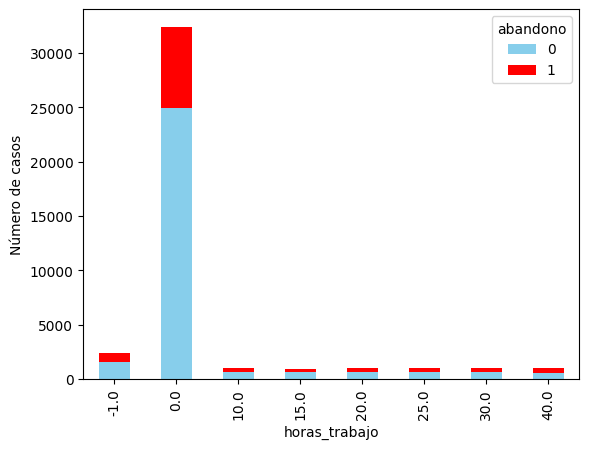

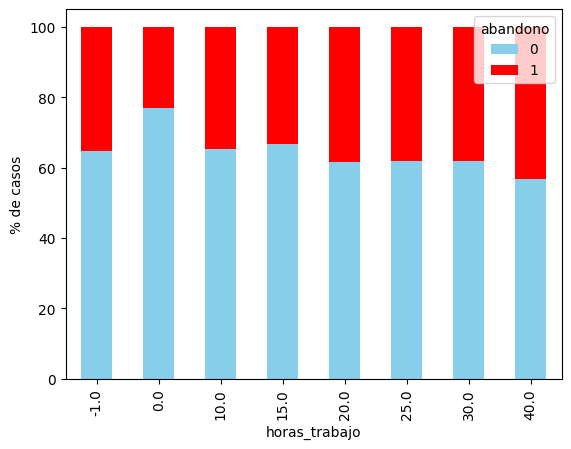

In [10]:
df_copia =df_train.copy(deep=True)

# En las personas que no han trabajado, sustituyo los valores perdidos por un 0
df_copia.loc[df_copia['trabaja'] == 0, 'horas_trabajo'] = df_copia.loc[df_copia['trabaja'] == 0, 'horas_trabajo'].fillna(0)

# En las personas que si han trabajado les voy a poner los valores perdidos a -1 (solo para ver la distribución de estos)
df_copia.loc[df_copia['trabaja'] == 1, 'horas_trabajo'] = df_copia.loc[df_copia['trabaja'] == 1, 'horas_trabajo'].fillna(-1)

x = pd.crosstab(df_copia['horas_trabajo'], df_copia['abandono'])
x.plot(kind='bar', stacked=True, color=['skyblue', 'red'])
plt.ylabel("Número de casos")
plt.show()

# Ahora normalizada
x = pd.crosstab(df_copia['horas_trabajo'], df_train['abandono'], normalize='index') * 100
x.plot(kind='bar', stacked=True, color=['skyblue', 'red'])
plt.ylabel("% de casos")
plt.show()

No parece aportar mucha más información que la anterior, de hecho una vez puesta de esta manera, practicamente es la misma pero con más información (si no fuera por los valores a -1 que son los verdaderamente perdidos).

Hay  0  valores perdidos en 'modalidad'


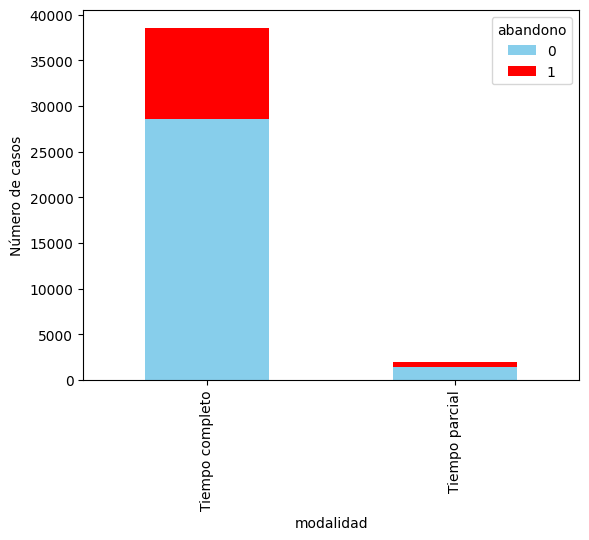

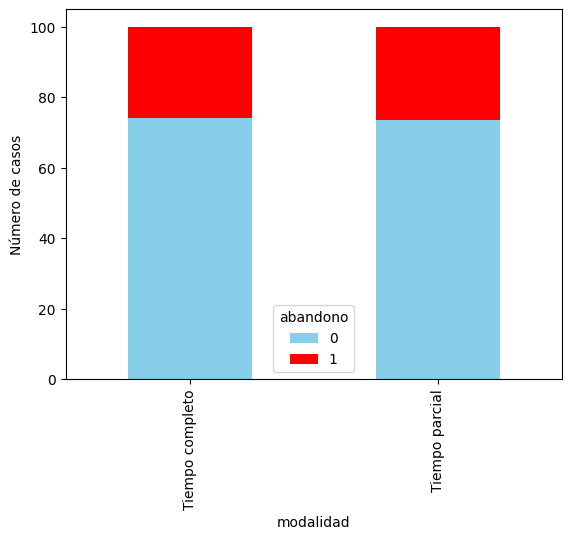

In [11]:
# variable modalidad
perdidos = df_train['modalidad'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'modalidad'")

x = pd.crosstab(df_train['modalidad'], df_train['abandono'])
x.plot(kind='bar', stacked=True, color=['skyblue', 'red'])
plt.ylabel("Número de casos")
plt.show()

x = pd.crosstab(df_train['modalidad'], df_train['abandono'],normalize='index')*100
x.plot(kind='bar', stacked=True, color=['skyblue', 'red'])
plt.ylabel("Número de casos")
plt.show()


No parece aportar mucha información, ya que por lo que se ve en la gráfica a simple vista la tasa de abandonos es la misma tanto a tiempo parcial como a tiempo completo.

Hay  0  valores perdidos en 'nota_acceso'


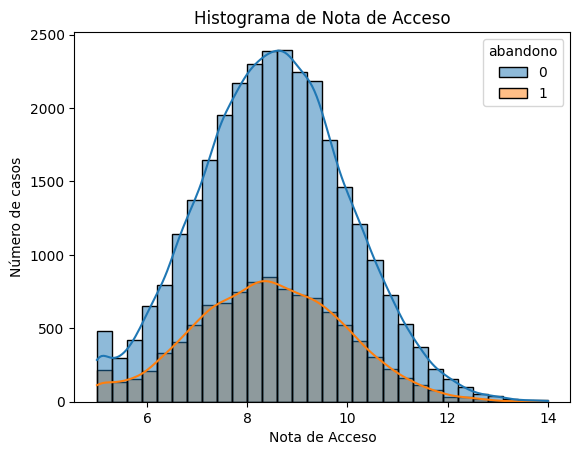

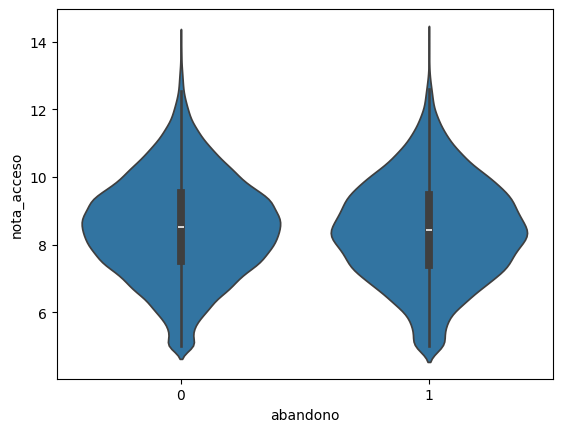

In [12]:
# variable nota_acceso
perdidos = df_train['nota_acceso'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'nota_acceso'")

sns.histplot(data=df_train, x='nota_acceso', hue='abandono', bins=30, kde=True)
plt.title('Histograma de Nota de Acceso')
plt.xlabel('Nota de Acceso')
plt.ylabel('Número de casos')
plt.show()

sns.violinplot(x='abandono', y='nota_acceso', data=df_train)
plt.show()


No parece ser muy relevante, ya que como se puede apreciar las distribuciones son practicamente las mismas para abandono a 1 y a 0; si a caso en los valores más bajos paarece que puede ser útil.

Hay  1061  valores perdidos en 'nota_s1'


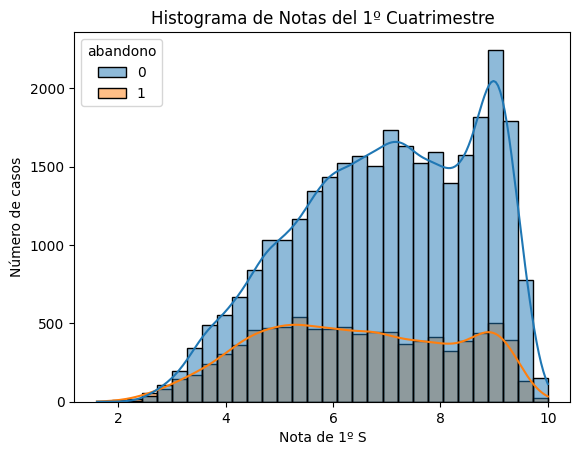

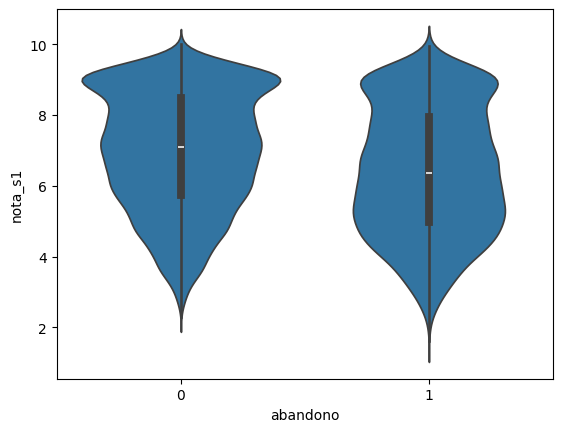

In [13]:
# variable nota_s1
perdidos = df_train['nota_s1'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'nota_s1'")

sns.histplot(data=df_train,x='nota_s1',hue='abandono', bins=30, kde=True)
plt.title('Histograma de Notas del 1º Cuatrimestre')
plt.xlabel('Nota de 1º S')
plt.ylabel('Número de casos')
plt.show()

sns.violinplot(x='abandono', y='nota_s1', data=df_train)
plt.show()

Voy a repetir lo que he hecho antes con una variable copia de df_train.

In [14]:
df_copia=df_train.copy(deep=True)

df_copia['nota_s1'].fillna(-1, inplace=True)

x = df_train[df_copia['nota_s1'] == -1]

y=x.groupby('abandono').size()
print(y)

abandono
0      34
1    1027
dtype: int64


/tmp/ipykernel_585/3575583941.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copia['nota_s1'].fillna(-1, inplace=True)


De las columnas con valores perdidos, hay un porcentaje mucho mayor de abandonos que de no abandonos. Esto puede tener sentido si los valores perdidos de esta variable corresponden a 'no presentado' o algo del estilo.

Hay  0  valores perdidos en 'satisfaccion'


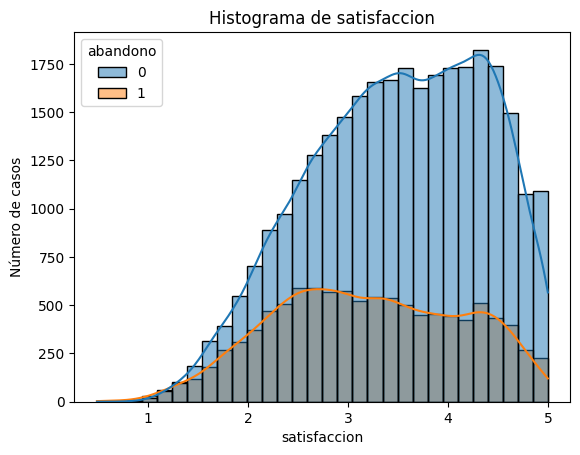

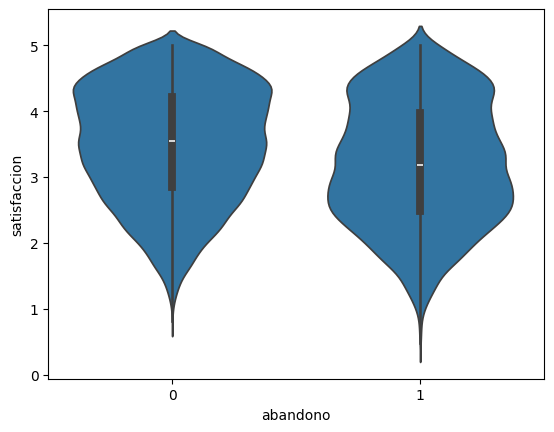

In [15]:
# Variable satisfacción
perdidos = df_train['satisfaccion'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'satisfaccion'")

sns.histplot(data=df_train, x='satisfaccion', hue='abandono', bins=30, kde=True)
plt.title('Histograma de satisfaccion')
plt.xlabel('satisfaccion')
plt.ylabel('Número de casos')
plt.show()

sns.violinplot(x='abandono', y='satisfaccion', data=df_train)
plt.show()



Puede ser interesante utilizar esta variable, especialmente en intervalos con valores bastante bajos, que es donde parece haber mayor porcentaje de abandonos que de no.

Hay  0  valores perdidos en 'posts_foro'


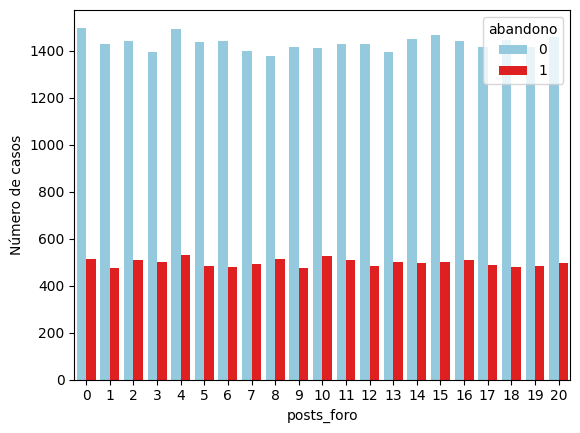

In [16]:
# variable posts_foro
perdidos = df_train['posts_foro'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'posts_foro'")

sns.countplot(data=df_train, x='posts_foro', hue='abandono', palette=['skyblue', 'red'])
plt.ylabel('Número de casos')
plt.show()

Esta variable no parece aportar demasiada información, ya que para casi todos los valores para esta variable, hay un porcentaje muy parecido de abandonos y no abandonos.

Hay  0  valores perdidos en 'uso_biblioteca'


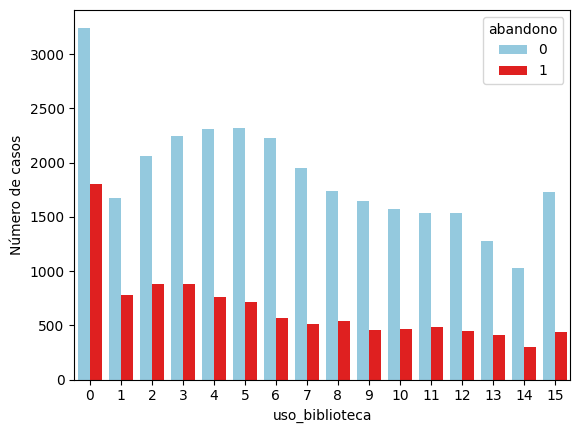

In [17]:
# variable uso_biblioteca
perdidos = df_train['uso_biblioteca'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'uso_biblioteca'")

sns.countplot(data=df_train, x='uso_biblioteca', hue='abandono', palette=['skyblue', 'red'])
plt.ylabel('Número de casos')
plt.show()

La variable uso_biblioteca parece que puede ser útil, ya que en valores bajos, la relación abandono/no abandono es mayor que de normal, y en valores altos es menor.

Hay  0  valores perdidos en 'creditos_a1'
Número de valores que no son 60:  1998
abandono
0    1470
1     528
Name: count, dtype: int64


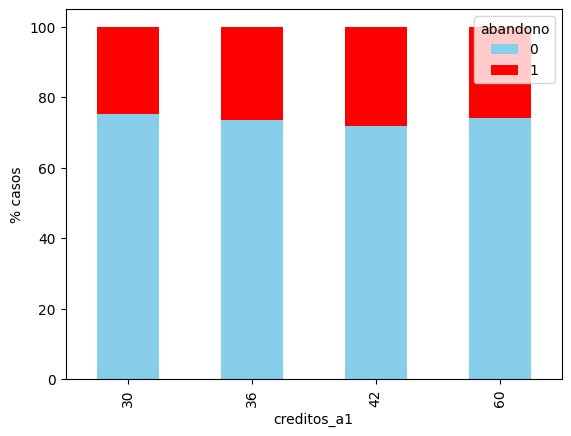

In [18]:
# variable creditos_a1
perdidos = df_train['creditos_a1'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'creditos_a1'")

x=(df_train['creditos_a1']!=60)
print('Número de valores que no son 60: ',x.sum())
y=df_train[x]['abandono'].value_counts()
print(y)


x = pd.crosstab(df_train['creditos_a1'], df_train['abandono'], normalize='index') * 100
x.plot(kind='bar', stacked=True, color=['skyblue', 'red'])
plt.ylabel('% casos')
plt.show()


Esta variable, tiene casi todos los valores iguales, y las que son diferentes la distribución de abandonos y no abandonos es casi identica, por lo que seguramente no sea muy determinante su uso.

Hay  0  valores perdidos en 'superados_a1'


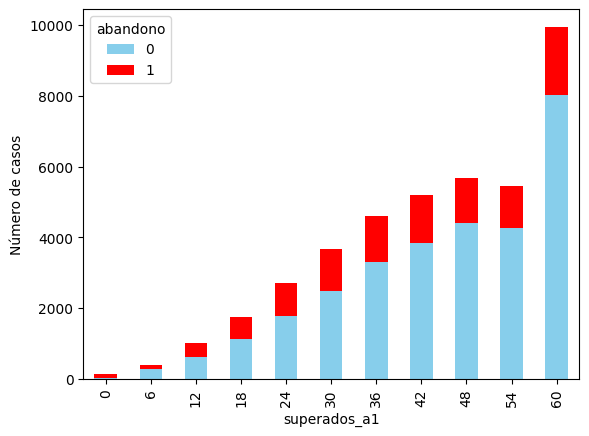

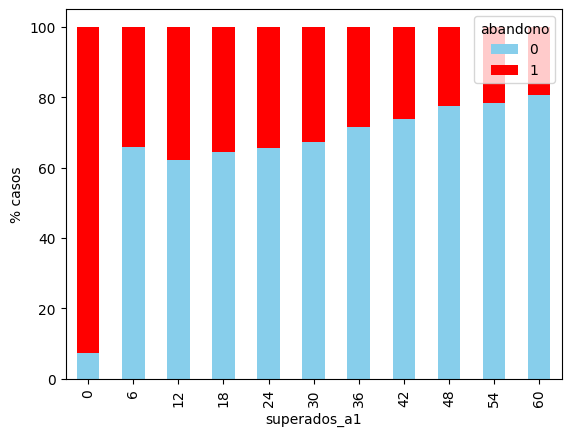

In [19]:
# variable superados_a1

perdidos = df_train['superados_a1'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'superados_a1'")

#x=(df_train['superados_a1']!=60)
#print('Número de valores que no son 60: ',x.sum())
#y=df_train[x]['abandono'].value_counts()
#print(y)

x = pd.crosstab(df_train['superados_a1'], df_train['abandono'])
x.plot(kind='bar', stacked=True, color=['skyblue', 'red'])
plt.ylabel('Número de casos')
plt.show()

x = pd.crosstab(df_train['superados_a1'], df_train['abandono'], normalize='index') * 100
x.plot(kind='bar', stacked=True, color=['skyblue', 'red'])
plt.ylabel('% casos')
plt.show()

Parece ser bastante importante, ya que conforme el valor de la variable va bajando, la proporción de abandono/no abandono va subiendo, y de manera bastante significativa (sobre todo cuando la variable toma valor 0).

Hay  0  valores perdidos en 'eventos'


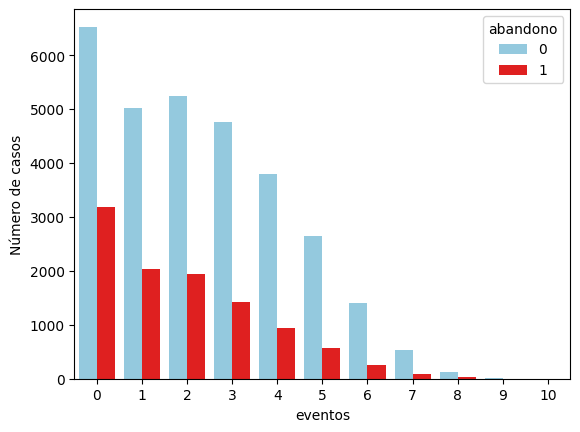

In [20]:
# variable eventos
perdidos = df_train['eventos'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'eventos'")

sns.countplot(data=df_train, x='eventos', hue='abandono', palette=['skyblue', 'red'])
plt.ylabel('Número de casos')
plt.show()

Parece aportar buena información, ya que en valores bajos, la proporción de abandonos es mayor, y conforme esta variable pa aumentado, los abandonos disminuyen.

Hay  0  valores perdidos en 'tutorias'


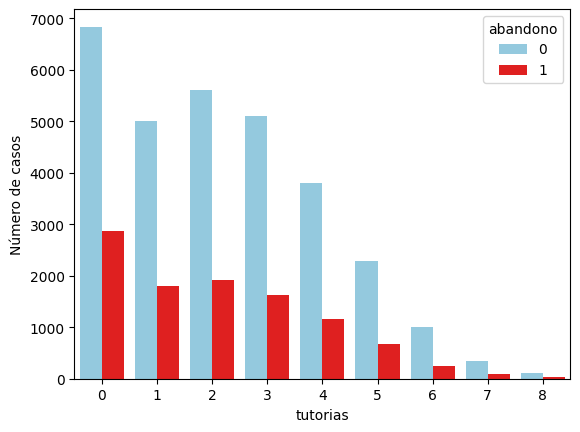

In [21]:
# variable tutorias
perdidos = df_train['tutorias'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'tutorias'")

sns.countplot(data=df_train, x='tutorias', hue='abandono', palette=['skyblue', 'red'])
plt.ylabel('Número de casos')
plt.show()

Practicamente igual a la variable anterior, puede resultar bastante útil, especialmente si entre las variables 'tutorias', 'eventos' y 'uso_biblioteca' hay alguna relación (ya que tienen distribuciones muy parecidas)

Hay  0  valores perdidos en 'numero_fav'
Hay  100  valores distintos en la variable "numero_fav"


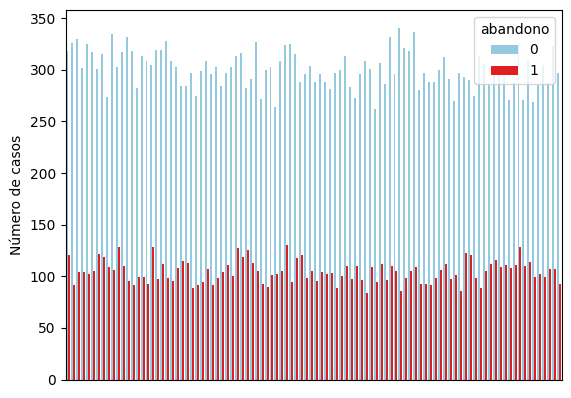

In [22]:
# variable numero_fav
perdidos = df_train['numero_fav'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'numero_fav'")

x= df_train['numero_fav'].nunique()
print('Hay ',x,' valores distintos en la variable "numero_fav"')

sns.countplot(data=df_train, x='numero_fav', hue='abandono', palette=['skyblue', 'red'])
plt.ylabel('Número de casos')
plt.xticks([])
plt.xlabel('')
plt.show()

Existe un problema con esta variable, y es que tiene muchos valores distintos, (lo que puede complicar mucho el modelo en función de como procesemos la veriable); pero no parece aportar una gran información, al menos por si sola.

Hay  0  valores perdidos en 'talla_zapato'
Hay  15  valores distintos en la variable "talla_zapato"


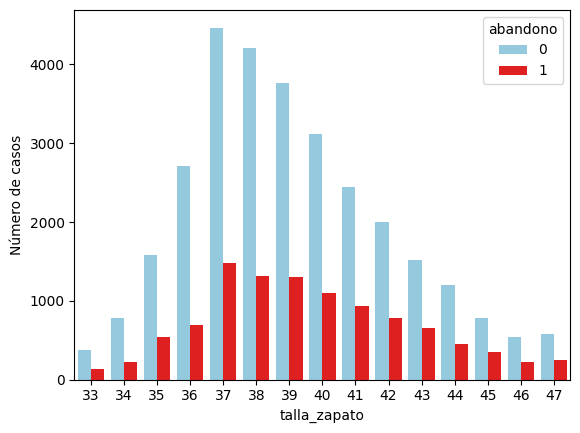

In [23]:
# variable talla_zapato
perdidos = df_train['talla_zapato'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'talla_zapato'")

x= df_train['talla_zapato'].nunique()
print('Hay ',x,' valores distintos en la variable "talla_zapato"')

sns.countplot(data=df_train, x='talla_zapato', hue='abandono', palette=['skyblue', 'red'])
plt.ylabel('Número de casos')
plt.show()

Esta variable sorprendentemente parece aportar bastante información, ya que la proporción de abandono/no abandono va haciendose significativamente mayor conforme la varibale también va aumentando su valor.

Hay  0  valores perdidos en 'color_fav'
Hay  139  valores distintos en la variable "color_fav"


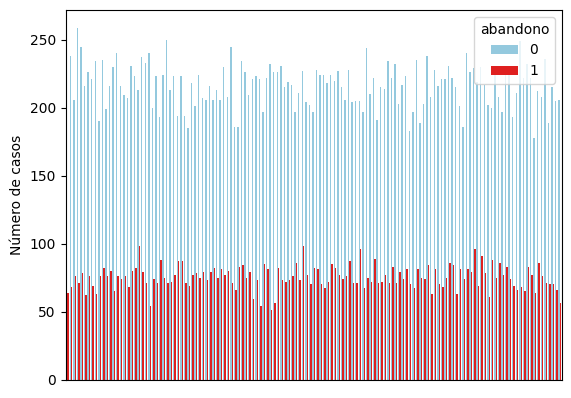

In [24]:
# variable color_fav
perdidos = df_train['color_fav'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'color_fav'")

x= df_train['color_fav'].nunique()
print('Hay ',x,' valores distintos en la variable "color_fav"')

sns.countplot(data=df_train, x='color_fav', hue='abandono', palette=['skyblue', 'red'])
plt.ylabel('Número de casos')
plt.xticks([])
plt.xlabel('')
plt.show()

Esta variable tiene el mismo problema que numero_fav, pero más pronunciado, ya que toma todavía más valores.

Hay  0  valores perdidos en 'meses_matriculado'


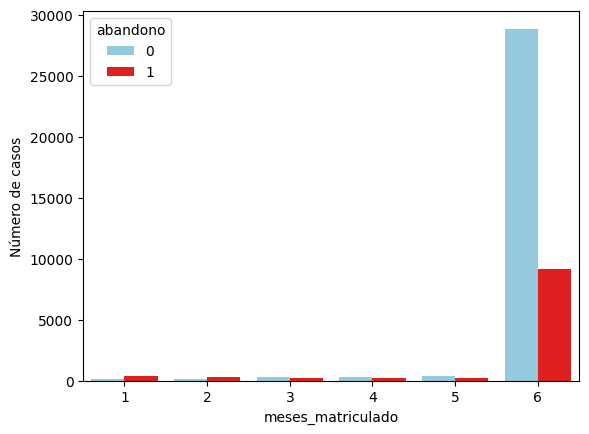

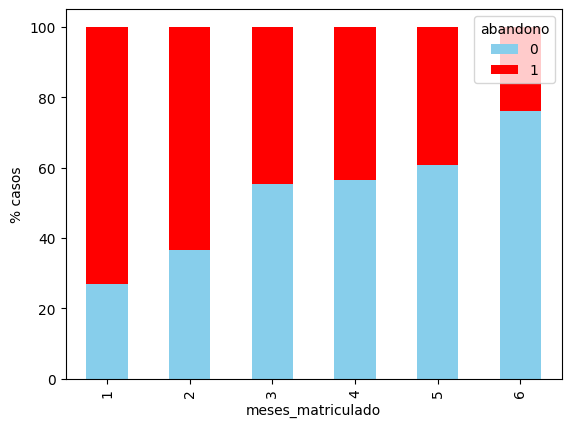

In [25]:
# variable meses_matriculado
perdidos = df_train['meses_matriculado'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'meses_matriculado'")

sns.countplot(data=df_train, x='meses_matriculado', hue='abandono', palette=['skyblue', 'red'])
plt.ylabel('Número de casos')
plt.show()

x = pd.crosstab(df_train['meses_matriculado'], df_train['abandono'], normalize='index') * 100
x.plot(kind='bar', stacked=True, color=['skyblue', 'red'])
plt.ylabel('% casos')
plt.show()

Esta variable si que parece aportar bastante información, ya que se puede ver una relación clara entre los meses matriculados y si el alumno abandona o no; aunque si que es cierto que la grandísima mayoria de las filas tienen valor '6'.

Hay  12295  valores perdidos en 'comentarios'
Hay  524  valores distintos para la variable "comentaios"


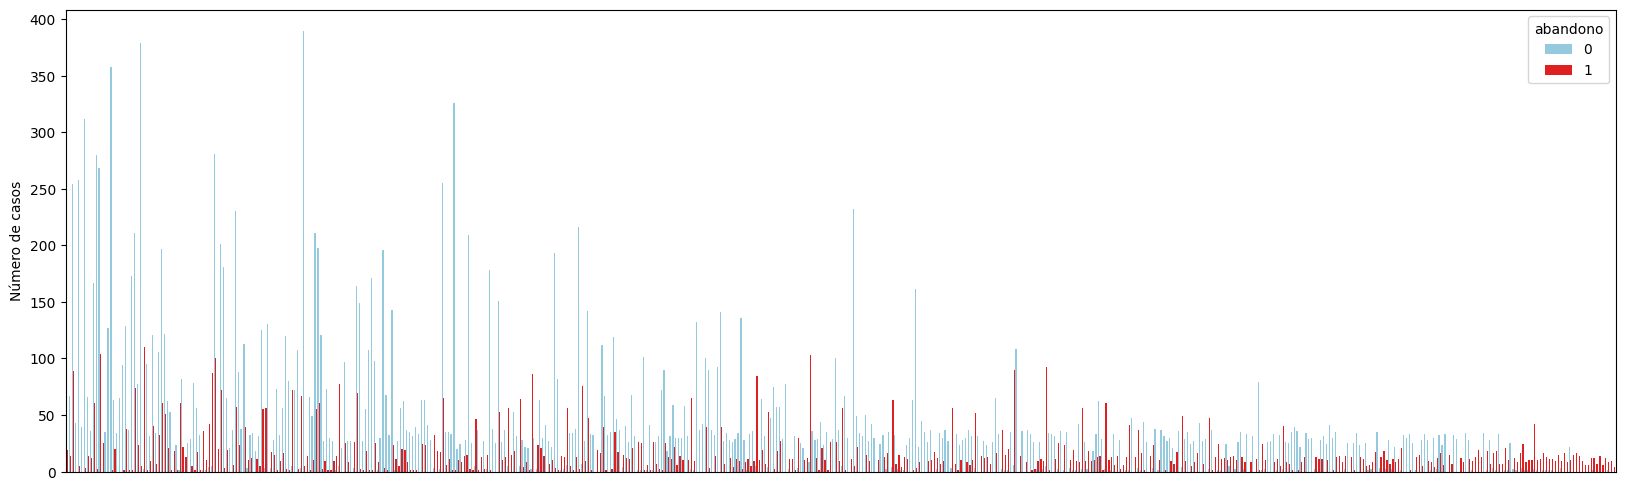

In [26]:
# variable comentarios
perdidos = df_train['comentarios'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'comentarios'")

x = df_train['comentarios'].nunique()
print('Hay ',x,' valores distintos para la variable "comentaios"')

plt.figure(figsize=(20, 6))
sns.countplot(data=df_train, x='comentarios', hue='abandono', palette=['skyblue', 'red'])
plt.ylabel('Número de casos')
plt.xticks([]) # Necesario por la cantidad de categorías
plt.xlabel('')
plt.show()

A pesar de que esta variable tiene una ingente cantidad de valores distintos, parece que puede aportar mucha información, ya que en el gráfico de pueden ver muchas columnas rojas grandes sin haber azules al lado, lo que que quiere decir que hay determinadas bastantes clases con un muy grande porcentaje de abandonos; y también ocurre al revés de manera incluso más notoria.

In [27]:
# variable grupo_trabajo
perdidos = df_train['grupo_trabajo'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'grupo_trabajo'")

x = df_train['grupo_trabajo'].nunique()
print('Hay ',x,' valores distintos para la variable "grupo_trabajo"')

    # Esta gráfica está comentada porque tarda mucho en crearse.
#plt.figure(figsize=(20, 6))
#sns.countplot(data=df_train, x='grupo_trabajo', hue='abandono', palette=['skyblue', 'red'])
#plt.ylabel('Número de casos')
#plt.xticks([]) # Necesario por la cantidad de categorías
#plt.xlabel('')
#plt.show()

Hay  0  valores perdidos en 'grupo_trabajo'
Hay  15942  valores distintos para la variable "grupo_trabajo"


Dudo mucho que use esta variable, ya que tiene muchisimos valores distintos, y como mucho se repiten 5 veces, por lo que creo que no aporta demasiada información. Además intentando ser coherentes, no tiene mucho sentido usar esta variable, ya que nuevos estudiantes tendrán grupos nuevos (distintos de estos).

Ahora voy a pasar con las varibles que necesitaré retocar aunque sea un poco para poder estudiarlas. Lo haré usando igual que antes un df copia del original, para no modificar este.

In [28]:
# variable horas_moodle
perdidos = df_train['horas_moodle'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'horas_moodle'")

x = df_train['horas_moodle'].dtype
print('El tipo de "horas_moodle" es: ',x)

df_copia=df_train.copy(deep=True)

import re

# Función que transforma los datos a números de tipo float64
def limpiar_horas_moodle(valor):
    match = re.search(r'[\d\.]+', str(valor))

    if match:
        return float(match.group(0))
    else:
        return None

Hay  0  valores perdidos en 'horas_moodle'
El tipo de "horas_moodle" es:  object


El nuevo tipo de "horas_moodle" es:  float64
0         7.2
1        11.8
2         8.8
3         8.7
4         9.6
         ... 
40540     1.1
40541    11.5
40542     5.1
40543     8.0
40544     9.0
Name: horas_moodle, Length: 40545, dtype: float64


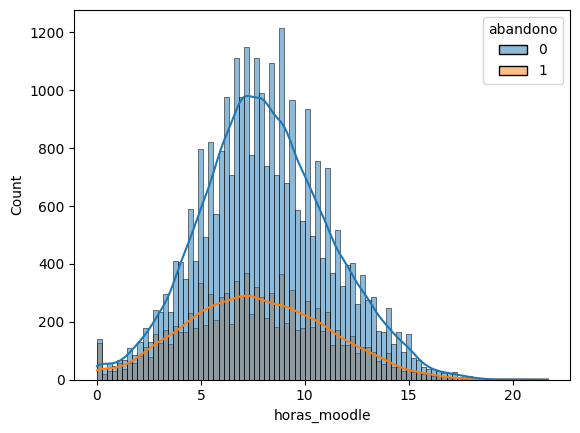

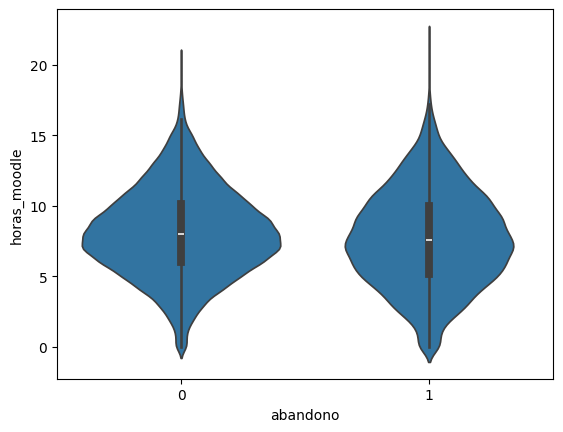

In [29]:
df_copia['horas_moodle']=df_copia['horas_moodle'].apply(limpiar_horas_moodle)

x = df_copia['horas_moodle'].dtype
print('El nuevo tipo de "horas_moodle" es: ',x)

print(df_copia['horas_moodle'])

sns.histplot(df_copia, x='horas_moodle', hue='abandono', kde=True)
plt.show()

sns.violinplot(x='abandono', y='horas_moodle', data=df_copia)
plt.show()

Trás transformar esta variable, y analizarla, parece bastante importante, ya que puede aportar bastante información sobre todo cuando toma valores bajos.

Hay  0  valores perdidos en 'provincia'
Hay  53  valores distintos para la variable "provincia"


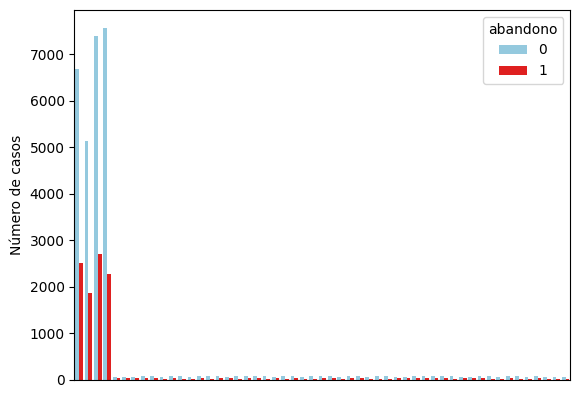

In [30]:
# variable provincia
perdidos = df_train['provincia'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'provincia'")

x = df_train['provincia'].nunique()
print('Hay ',x,' valores distintos para la variable "provincia"')

sns.countplot(data=df_train, x='provincia', hue='abandono', palette=['skyblue', 'red'])
plt.ylabel('Número de casos')
plt.xticks([])
plt.xlabel('')
plt.show()

# Voy a transformar esta variable, de tal manera que todas las clases minoritaris (las que no son Albacete, Cuenca, Tolefo y Ciudad Real) esten agrupadas en un valor, 'Otro'.
def limpiar_provincia(provincia: str) -> str:
    provincias_principales = {'Albacete', 'Cuenca', 'Ciudad Real', 'Toledo'}
    
    if provincia in provincias_principales:
        return provincia
    else:
        return 'Otro'


0           Albacete
1             Cuenca
2        Ciudad Real
3             Toledo
4           Albacete
            ...     
40540       Albacete
40541         Toledo
40542    Ciudad Real
40543       Albacete
40544         Cuenca
Name: provincia, Length: 40545, dtype: object


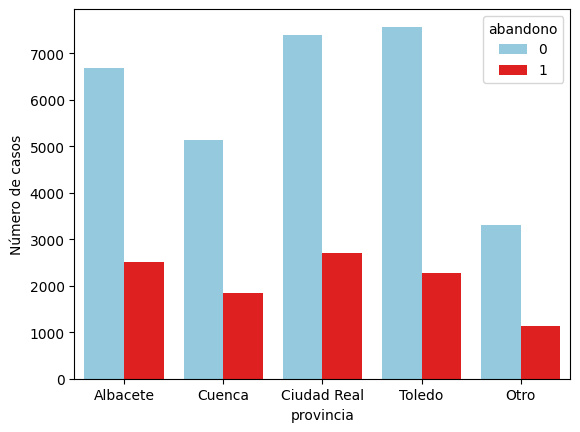

In [31]:
df_copia=df_train.copy(deep=True)

df_copia['provincia']=df_copia['provincia'].apply(limpiar_provincia)

print(df_copia['provincia'])

sns.countplot(data=df_copia, x='provincia', hue='abandono', palette=['skyblue', 'red'])
plt.ylabel('Número de casos')
plt.show()

Esta variable no parece aportar demasiado, incluso después de la transformación, aun así puede ser interesante usarla.

In [32]:
# variable nacimiento
perdidos = df_train['nacimiento'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'nacimiento'")

x = df_train['nacimiento'].nunique()
print('Hay ',x,' valores distintos para la variable "nacimiento"')

def limpiar_nacimiento(fecha) -> int:
    if pd.isna(fecha):
        return np.nan  
    return fecha.year

Hay  0  valores perdidos en 'nacimiento'
Hay  5699  valores distintos para la variable "nacimiento"


El tipo de dato de "nacimiento" antes de la conversion es:  object
El tipo de dato de "nacimiento" despues de la conversion es:  datetime64[ns]
0        1992
1        1998
2        1992
3        1998
4        1993
         ... 
40540    1993
40541    1987
40542    1999
40543    1992
40544    1994
Name: nacimiento, Length: 40545, dtype: int64


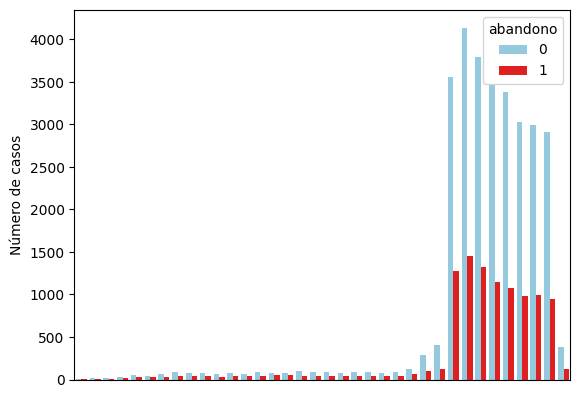

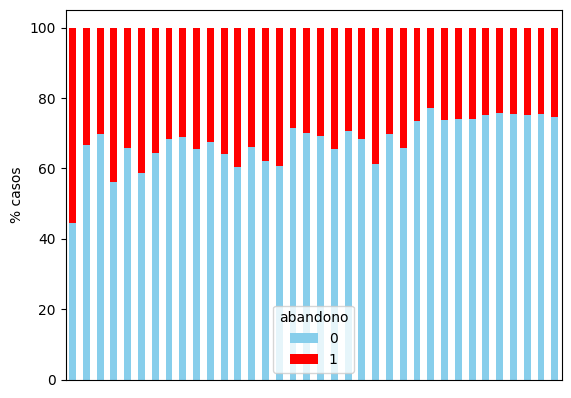

In [33]:
df_copia=df_train.copy(deep=True)

print('El tipo de dato de "nacimiento" antes de la conversion es: ',df_copia['nacimiento'].dtype)

# Cambio el tipo de object a datetime para poder extraer el año más facilmente
df_copia['nacimiento'] = pd.to_datetime(df_copia['nacimiento'], format='%Y-%m-%d', errors='coerce')

print('El tipo de dato de "nacimiento" despues de la conversion es: ',df_copia['nacimiento'].dtype)

df_copia['nacimiento']=df_copia['nacimiento'].apply(limpiar_nacimiento)

print(df_copia['nacimiento'])

sns.countplot(data=df_copia, x='nacimiento', hue='abandono', palette=['skyblue', 'red'])
plt.ylabel('Número de casos')
plt.xlabel('')
plt.xticks([])
plt.show()

x = pd.crosstab(df_copia['nacimiento'], df_train['abandono'], normalize='index') * 100
x.plot(kind='bar', stacked=True, color=['skyblue', 'red'])
plt.ylabel('% casos')
plt.xlabel('')
plt.xticks([])
plt.show()


Esta variable, después de toda la conversión, si que parece que puede aportar algo de información, ya que teniendo en cuenta simplemente los años, se puede agrupar mucho más, (he pensado que agrupar por días o meses no tendría demasiado sentido) y en estas agrupaciones se puede ver como va variando la proporción de abandonos, sobre todos en los años más antiguos (aunque sean los que menos casos tengan con diferencia).

In [34]:
# variable bachillerato

perdidos = df_train['bachillerato'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'bachillerato'")

x = df_train['bachillerato'].nunique()
print('Hay ',x,' valores distintos para la variable "bachillerato"')

df_copia=df_train.copy(deep=True)

print('El tipo de dato de "bachillerato" : ',df_copia['nacimiento'].dtype)

# primero convierto todo a minusculas, para eliminar los valores repetidos en mayusculas o altenando mayusculas y minusculas

df_copia['bachillerato'] = df_copia['bachillerato'].str.lower()

print("Valores únicos después de la normalización: \n",df_copia['bachillerato'].unique())

Hay  0  valores perdidos en 'bachillerato'
Hay  23  valores distintos para la variable "bachillerato"
El tipo de dato de "bachillerato" :  object
Valores únicos después de la normalización: 
 ['científico' 'ciencias puras' 'humanidades' 'económico' 'artes' 'ccss'
 'ciencias sociales' 'ciencias' 'letras' 'cientifico-tecnologico'
 'tecnológico' 'tecnológico industrial']


Valores unicos después de la sustitución: 
 ['ciencias' 'humanidades' 'ciencias sociales' 'artes' 'tecnologico']


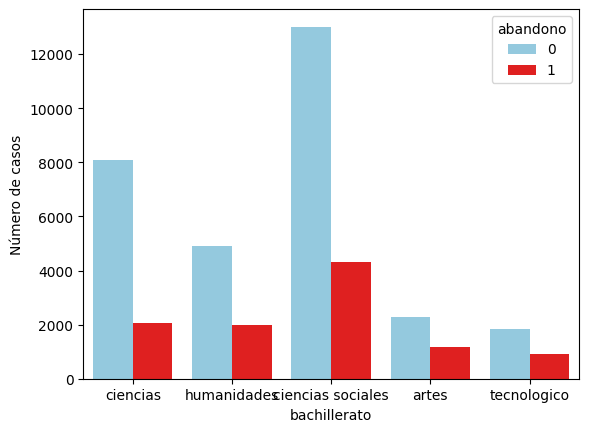

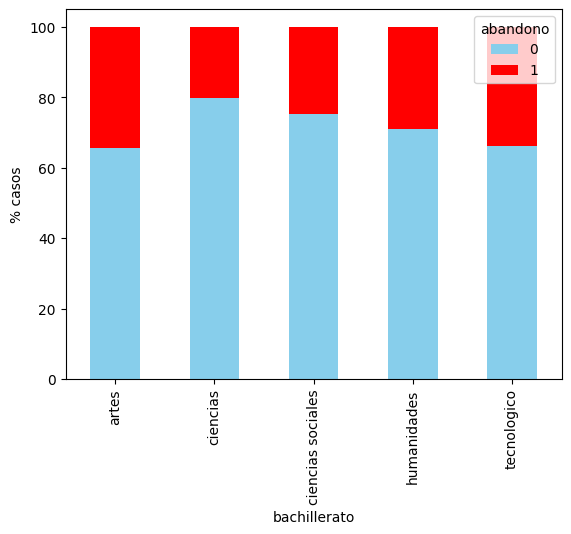

In [35]:
# Lo que voy a hacer ahora es aplicar un método que he encontrado, que se basa en utilizar un diccionario, para sustituir los valores por otros
diccionario={
    'científico': 'ciencias',
    'ciencias puras' : 'ciencias',
    'ciencias': 'ciencias',
    'cientifico-tecnologico' : 'tecnologico',
    'tecnológico' : 'tecnologico',
    'tecnológico industrial' : 'tecnologico',
    'humanidades' : 'humanidades',
    'letras' : 'humanidades',
    'económico' : 'ciencias sociales',
    'ccss' : 'ciencias sociales',
    'ciencias sociales' : 'ciencias sociales',
    'artes' : 'artes'
}

df_copia['bachillerato'] = df_copia['bachillerato'].replace(diccionario)

print('Valores unicos después de la sustitución: \n',df_copia['bachillerato'].unique())

sns.countplot(data=df_copia, x='bachillerato', hue='abandono', palette=['skyblue', 'red'])
plt.ylabel('Número de casos')
plt.show()

x = pd.crosstab(df_copia['bachillerato'], df_train['abandono'], normalize='index') * 100
x.plot(kind='bar', stacked=True, color=['skyblue', 'red'])
plt.ylabel('% casos')
plt.show()

Esta variable, después del proceso de trasformación, parece que puede ser útil.

El resto de variables, simplemente voy a hacerles un rápido análisis, ya que no las voy a usar.

In [36]:
# variable id
perdidos = df_train['id'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'id'")

x = df_train['id'].nunique()
print('Hay ',x,' valores distintos para la variable "id"')

# variable nombre
perdidos = df_train['nombre'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'nombre'")

x = df_train['nombre'].nunique()
print('Hay ',x,' valores distintos para la variable "nombre"')

# variable residencia_id
perdidos = df_train['residencia_id'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'residencia_id'")

x = df_train['residencia_id'].nunique()
print('Hay ',x,' valores distintos para la variable "residencia_id"')

Hay  0  valores perdidos en 'id'
Hay  40532  valores distintos para la variable "id"
Hay  0  valores perdidos en 'nombre'
Hay  40530  valores distintos para la variable "nombre"
Hay  28890  valores perdidos en 'residencia_id'
Hay  300  valores distintos para la variable "residencia_id"


Por motivos obvios no voy a usar 'id', y tampoco 'nombre'. Lo que tal vez podría usar es residencia_id, pero tiene demasiados valores distintos y una gran cantidad de valores nulos, por lo que no creo que sea conveniente usarla.

Ahora voy a pasar a analizar algunas relaciones multivariable.

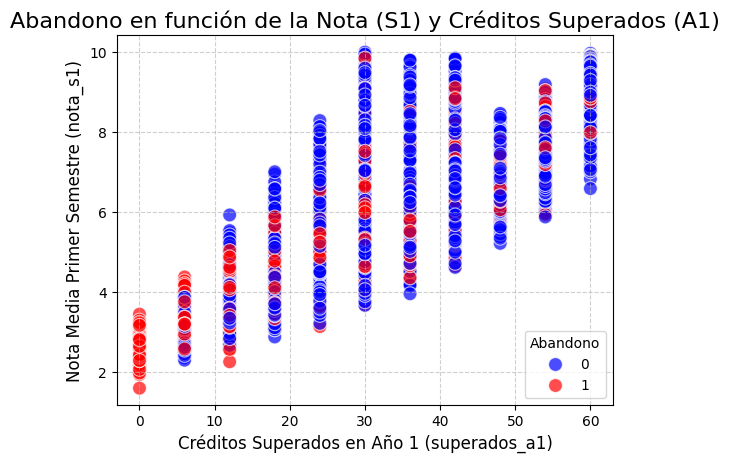

In [37]:
# relación entre superados_a1, nota_s1 y abandono
sns.scatterplot(
    data=df_train,
    x='superados_a1',       # Eje X: Créditos Superados
    y='nota_s1',            # Eje Y: Nota del Primer Semestre
    hue='abandono',   # Color: Variable Objetivo
    palette={1: 'red', 0: 'blue'}, # Definir colores
    s=100,                  # Tamaño de los puntos
    alpha=0.7               # Transparencia
)

plt.title('Abandono en función de la Nota (S1) y Créditos Superados (A1)', fontsize=16)
plt.xlabel('Créditos Superados en Año 1 (superados_a1)', fontsize=12)
plt.ylabel('Nota Media Primer Semestre (nota_s1)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Abandono', loc='lower right')
plt.show()



En este gráfico se puede ver como la variable abandono toma muchos más valores 1 cuando superados_a1 y nota_s1 son más bajos.

<Figure size 1000x600 with 0 Axes>

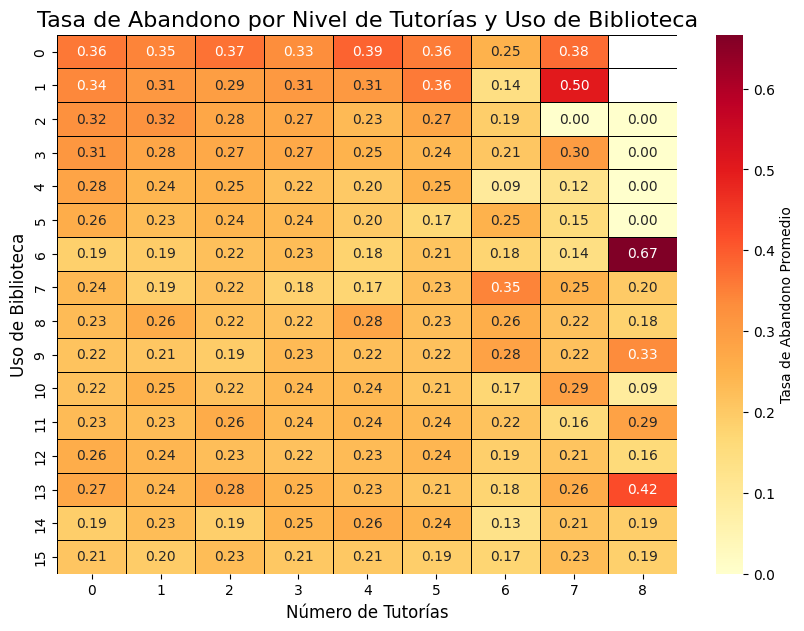

In [ ]:
# relación entre uso_biblioteca y tutorias
plt.figure(figsize=(10, 6))

heatmap_data = df_train.pivot_table(
    values='abandono',         
    index='uso_biblioteca',
    columns='tutorias',     
    aggfunc='mean'             
)

plt.figure(figsize=(10, 7))
sns.heatmap(
    heatmap_data,
    annot=True,     
    fmt=".2f",      
    cmap="YlOrRd",  
    linewidths=.5,  
    linecolor='black',
    cbar_kws={'label': 'Tasa de Abandono Promedio'}
)

plt.title('Tasa de Abandono por Nivel de Tutorías y Uso de Biblioteca', fontsize=16)
plt.xlabel('Número de Tutorías', fontsize=12)
plt.ylabel('Uso de Biblioteca', fontsize=12)
plt.show()

En esta gráfica, se puede ver como en salvo algunas excepciones, la variable que es más importantes es 'uso_biblioteca', ya que es con su valor mínimo donde más probabilidad de abandono hay (salvo algunas excepciones desperdigadas); mientras que en la varibale 'tutorias', por lo general no modifica tanto la probabilidad de abandono con forme eta va variando.

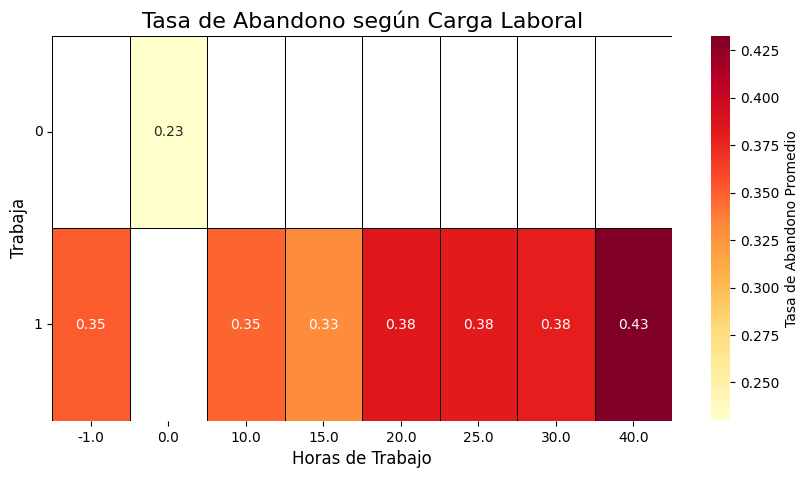

In [43]:
# Realción entre trabaja u horas_trabajo

# Lo primero será volver a crear un df_copia con la transformación previa de horas_trabajo
df_copia =df_train.copy(deep=True)
df_copia.loc[df_copia['trabaja'] == 0, 'horas_trabajo'] = df_copia.loc[df_copia['trabaja'] == 0, 'horas_trabajo'].fillna(0)
df_copia.loc[df_copia['trabaja'] == 1, 'horas_trabajo'] = df_copia.loc[df_copia['trabaja'] == 1, 'horas_trabajo'].fillna(-1)

heatmap_data = df_copia.pivot_table(
    values='abandono',          # La variable objetivo (tasa de abandono)
    index='trabaja',      # Filas (Trabaja: Sí/No)
    columns='horas_trabajo',        # Columnas (Rangos de Horas)
    aggfunc='mean'              # Queremos la media (tasa de abandono)
)

plt.figure(figsize=(10, 5))
sns.heatmap(
    heatmap_data,
    annot=True,     # Mostrar el valor en cada celda
    fmt=".2f",      # Formato de los valores (2 decimales)
    cmap="YlOrRd",  # Mapa de color: amarillos-naranjas-rojos (para riesgo)
    linewidths=.5,  # Líneas entre celdas
    linecolor='black',
    cbar_kws={'label': 'Tasa de Abandono Promedio'}
)

plt.title('Tasa de Abandono según Carga Laboral', fontsize=16)
plt.xlabel('Horas de Trabajo', fontsize=12)
plt.ylabel('Trabaja', fontsize=12)
plt.yticks(rotation=0) # Mejor visualización de las etiquetas del eje Y
plt.show()

En este heatmap, se puede ver lo que comente previamente pero mucho más claro. Se aprecia de manera clara como lagente que no trabaja tiene un tasa de abandono mucho menor, que la que si trabaja, sobre todo cuando las horas van aumentando.

<Axes: xlabel='bachillerato', ylabel='nota_acceso'>

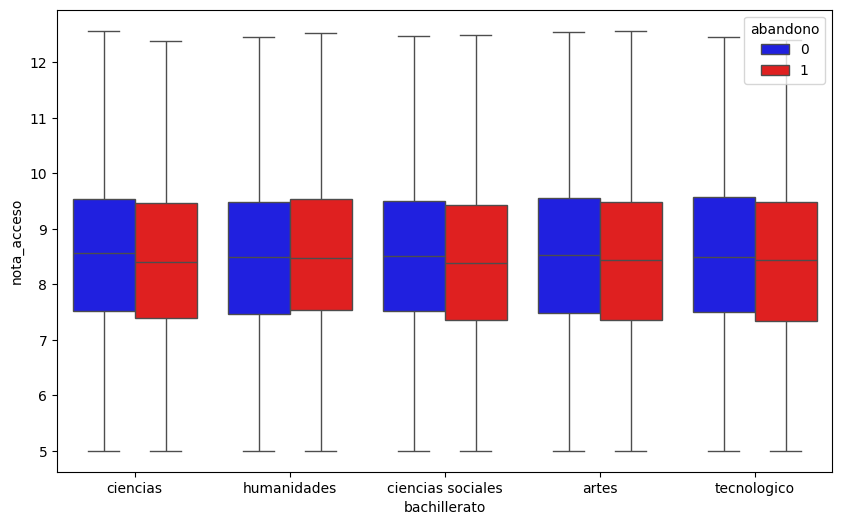

In [48]:
# relación entre nota_acceso y bachillerato

# de nuevo hay que aplicar la transformación hecha anteriormente, en este caso para bachillerato.

df_copia=df_train.copy(deep=True)
df_copia['bachillerato'] = df_copia['bachillerato'].str.lower()
df_copia['bachillerato'] = df_copia['bachillerato'].replace(diccionario)

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_copia,
    x='bachillerato',        # Eje X: Categórica principal
    y='nota_acceso',         # Eje Y: Continua
    hue='abandono',    # Color: Categórica secundaria (abandono)
    palette={1: 'red', 0: 'blue'},
    showfliers=False         # Oculta outliers para mejor visualización
)

En este gráfico, se puede ver como (salvo para humanidades) las distibuciones del abandono y no abandono para la nota acceso de cada bachillerato son practicamente iguales, lo que parece confirmarnos lo que antes he comentado, que la variable bachillerato no es muy relevante.

## 2. Prepocesamiento
Ahora voy a pasar con el preprocesamiento, el cual lo llevaré a cabo utilizando una pipeline de scikit learn (como se pide).

Lo primero será separar el datframe df_train en X e y

In [59]:
import pandas as pd
import numpy as np
import re
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

In [ ]:
#   Primero cargo de nuevo el .csv. Aunque no lo haya modificado, de esta manera me aseguro de que es correcto.
df_train = pd.read_csv('uclm_student_train.csv')

#   Separo el dataframe
y=df_train['abandono']
X=df_train.drop(columns=['abandono'])

Lo siguiente es declarar los tipos de variable segun quiero transformarlos.

In [57]:
# Numéricas genéricas
numericas=[
    'nota_acceso', 'creditos_a1', 'superados_a1', 'nota_s1', 'satisfaccion',
    'posts_foro', 'uso_biblioteca', 'eventos', 'tutorias',
    'meses_matriculado', 'talla_zapato', 'horas_trabajo'
]

# Categóricas genéricas
categoricas=[
    'trabaja', 'modalidad', 'comentarios'
]

# Variables que necesitan una transformación específica
fecha =['nacimiento']
moodle = ['horas_moodle']
provincia = ['provincia']
bachillerato = ['bachillerato']

Ahora voy a crear mis transformadores específicos.

In [ ]:
# Transformador para nacimento
class TransformadorNacimiento(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X, y=None):
        X_dt = pd.to_datetime(X.iloc[:, 0], format='%Y-%m-%d', errors='coerce')
        return X_dt.apply(lambda fecha: fecha.year if pd.notna(fecha) else np.nan).to_frame()
    
# Transformador para horas_moodle
class TransformadorHorasMoodle(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X, y=None):
        def limpiar_horas_moodle(valor):
            match = re.search(r'[\d\.]+', str(valor))
            return float(match.group(0)) if match else np.nan
        return X.iloc[:, 0].apply(limpiar_horas_moodle).to_frame()
    
# Transformador para provincia
class TransformadorProvincia(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X, y=None):
        provincias_principales = {'Albacete', 'Cuenca', 'Ciudad Real', 'Toledo'}
        def limpiar_provincia(prov):
            return prov if prov in provincias_principales else 'Otro'
        return X.iloc[:, 0].astype(str).apply(limpiar_provincia).to_frame()
    
# Transformador para bachillerato
class TransformadorBachillerato(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X, y=None):
        diccionario = {
            'científico': 'ciencias', 'ciencias puras': 'ciencias',
            'cientifico-tecnologico': 'tecnologico', 'tecnológico': 'tecnologico',
            'tecnológico industrial': 'tecnologico', 'letras': 'humanidades',
            'económico': 'ciencias sociales', 'ccss': 'ciencias sociales',
            'ciencias': 'ciencias', 'humanidades': 'humanidades',
            'ciencias sociales': 'ciencias sociales', 'artes': 'artes'
        }
        serie = X.iloc[:, 0].astype(str).str.lower().str.strip().replace(diccionario)
        return serie.fillna('missing').to_frame()
